In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [3]:
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map

In [4]:
# Loading your IBM Quantum account(s)
#IBMQ.save_account('dbb7563df15a87590b3bea773bc753eb48931947f7d06ba2fd77a1502cf76afe19bb1120b542d18ccb8a172d7c4fa1fea0dbf62e724382335c962c37066dda8e')

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibmq_santiago')

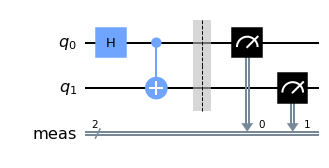

In [6]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()
qc.draw(output='mpl')

In [7]:
import qiskit.tools.jupyter
%qiskit_job_watcher 

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [9]:
# run job on real hardware
job = backend.run(transpile(qc, backend=backend), shots=1024)

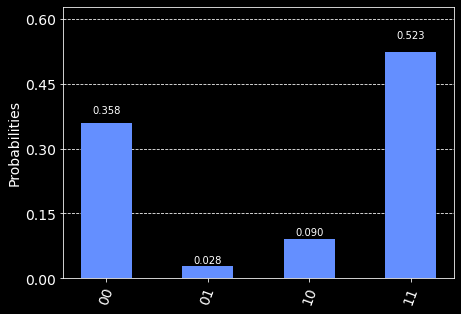

In [13]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())

In [12]:
# or retrieve previously-run job
job = backend.retrieve_job('62651a98edd5c63cf037169d') # your job id here